In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from keras import models
from keras import layers
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split




In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
X = train.drop('label', axis=1)
y = train['label']

In [4]:
X = X/255

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [784]


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', input_shape=[784]),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [7]:
history = model.fit(
    x_train,y_train ,
    epochs=50,
    batch_size=128,    
    validation_data =(x_test,y_test)    
)

Epoch 1/50
263/263 [==============================] - 3s 6ms/step - loss: 0.5872 - accuracy: 0.8177 - val_loss: 0.2244 - val_accuracy: 0.9392
Epoch 2/50
263/263 [==============================] - 2s 6ms/step - loss: 0.1377 - accuracy: 0.9609 - val_loss: 0.1423 - val_accuracy: 0.9570
Epoch 3/50
263/263 [==============================] - 1s 5ms/step - loss: 0.0902 - accuracy: 0.9722 - val_loss: 0.1242 - val_accuracy: 0.9619
Epoch 4/50
263/263 [==============================] - 1s 6ms/step - loss: 0.0663 - accuracy: 0.9789 - val_loss: 0.1177 - val_accuracy: 0.9686
Epoch 5/50
263/263 [==============================] - 2s 6ms/step - loss: 0.0480 - accuracy: 0.9851 - val_loss: 0.1225 - val_accuracy: 0.9645
Epoch 6/50
263/263 [==============================] - 2s 6ms/step - loss: 0.0400 - accuracy: 0.9871 - val_loss: 0.1429 - val_accuracy: 0.9632
Epoch 7/50
263/263 [==============================] - 2s 7ms/step - loss: 0.0329 - accuracy: 0.9893 - val_loss: 0.1177 - val_accuracy: 0.9710
Epoch 

<AxesSubplot:>

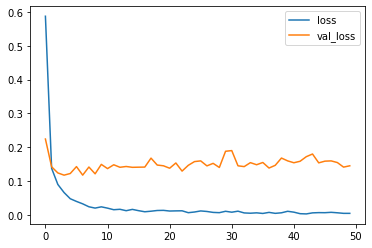

In [8]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

In [2]:
score = history.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

NameError: name 'history' is not defined

In [10]:
submit = pd.DataFrame(np.argmax(model.predict(test), axis=1), columns=['Label'], 
                      index=pd.read_csv('./sample_submission.csv')['ImageId'])

In [11]:
submit.index.name = 'ImageID'
submit.to_csv('submission3.csv')